## S08-L004 - pie plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
%matplotlib inline

In [3]:
import datetime

In [30]:
nasa = pd.read_csv("course-files/nasa_facebook_statuses.csv",
usecols=["status_published","num_reactions",
"num_comments","num_shares","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
#Group all columns by sum
nasa_by_month = nasa.groupby(by='month').sum()
nasa_by_month.head()

,num_reactions,num_comments,num_shares,num_likes
month,,,,
3,3003815,49108,392585,2846361
4,2927616,120118,370803,2760385
5,2708977,46122,393576,2548960


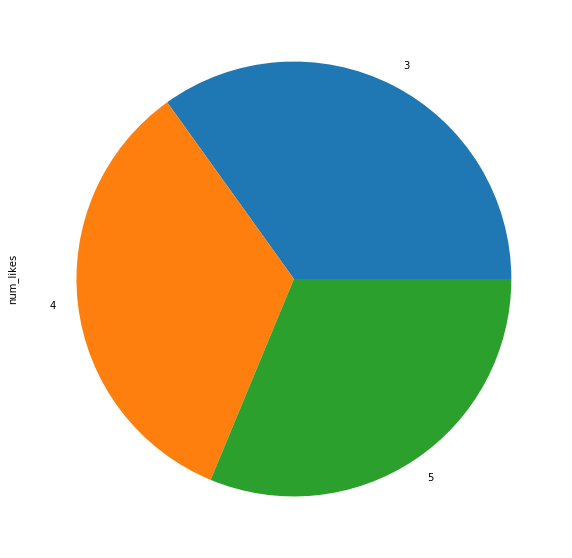

In [31]:
nasa_by_month['num_likes'].plot(kind='pie', figsize=(10,10))

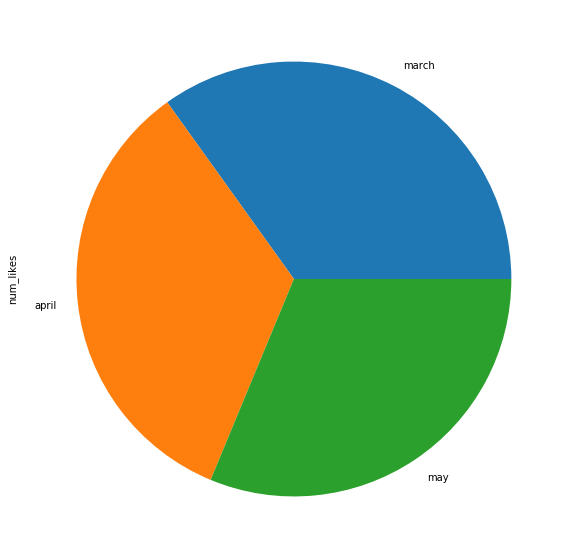

In [32]:

nasa_by_month['num_likes'].plot(kind='pie', figsize=(10,10), labels=['march', 'april', 'may'])

In [36]:
nasa_by_month.unstack().unstack().unstack()

month               
3      num_reactions    3003815
       num_comments       49108
       num_shares        392585
       num_likes        2846361
4      num_reactions    2927616
       num_comments      120118
       num_shares        370803
       num_likes        2760385
5      num_reactions    2708977
       num_comments       46122
       num_shares        393576
       num_likes        2548960
dtype: int64

In [38]:
nasa_by_month['months'] = ["March", "April", "May"]

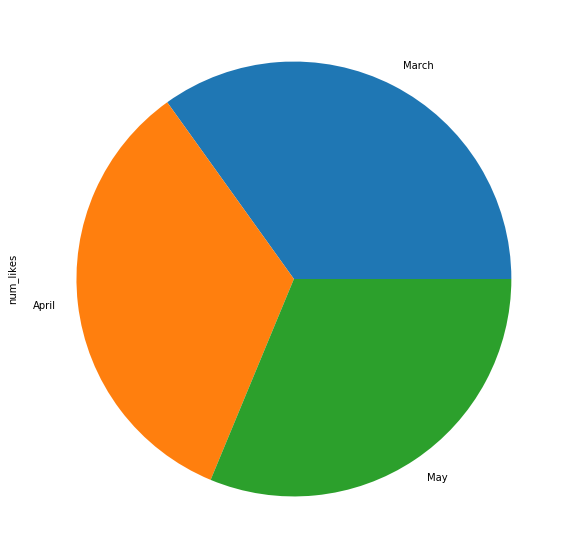

In [40]:
nasa_by_month['num_likes'].plot(kind='pie', figsize=(10,10), labels=nasa_by_month['months'])

In [44]:
nasa_by_month.drop(columns=['months'], inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf5055d390>,
      dtype=object)

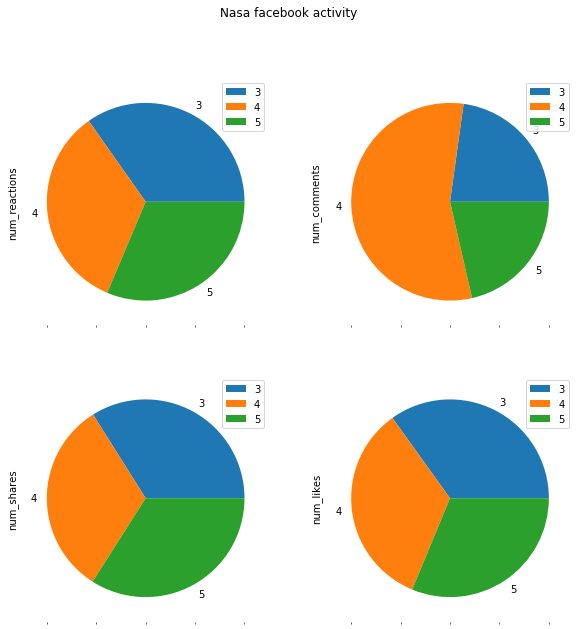

In [50]:
nasa_by_month.plot(kind='pie', figsize=(10,10), subplots=True, layout=(2,2), title="Nasa facebook activity")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf4f295990>,
      dtype=object)

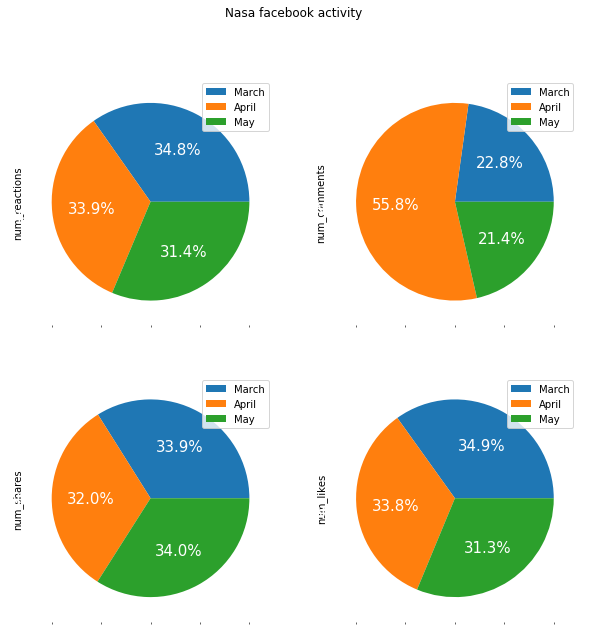

In [63]:
nasa_by_month.plot(kind='pie', figsize=(10,10), subplots=True, layout=(2,2), title="Nasa facebook activity",\
                  autopct='%.01f%%', fontsize=15, textprops={'color':'w'}, labels=["March", "April", "May"])